In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_csv('/mnt/c/Users/xtanv/Olympic Clean/Merged_dataset/Merged_dataset.csv')
df.head(3)

,Gender,Age,Height,Weight,NOC,Year,Season,Host_City,Events,Medal
0,Male,20.0,NaN,NaN,GER,1896.0,Summer,Athens,"Athletics Pole Vault, Men (Olympic)",NaN
1,Male,30.0,NaN,NaN,DEN,1896.0,Summer,Athens,"Athletics 500 metres Freestyle, Men (Olympic)",NaN
2,Male,24.0,NaN,NaN,AUT,1896.0,Summer,Athens,"Fencing 12-Hours Race, Men (Olympic)",Gold


In [3]:
df.shape

(143917, 10)

In [4]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Encode and print the mapping for each column
columns_to_encode = ['Gender', 'NOC', 'Season', 'Host_City', 'Events', 'Medal']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    # Print the mapping
    print(f"Mapping for {column}:")
    for class_label, numeric_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{class_label} -> {numeric_label}")
    print("\n")

# Display the first few rows of the transformed dataframe
df.head(3)

Mapping for Gender:
Female -> 0
Male -> 1


Mapping for NOC:
AFG -> 0
AHO -> 1
AIN -> 2
ALB -> 3
ALG -> 4
AND -> 5
ANG -> 6
ANT -> 7
ANZ -> 8
ARG -> 9
ARM -> 10
ARU -> 11
ASA -> 12
AUS -> 13
AUT -> 14
AZE -> 15
BAH -> 16
BAN -> 17
BAR -> 18
BDI -> 19
BEL -> 20
BEN -> 21
BER -> 22
BHU -> 23
BIH -> 24
BIZ -> 25
BLR -> 26
BOH -> 27
BOL -> 28
BOT -> 29
BRA -> 30
BRN -> 31
BRU -> 32
BUL -> 33
BUR -> 34
CAF -> 35
CAM -> 36
CAN -> 37
CAY -> 38
CGO -> 39
CHA -> 40
CHI -> 41
CHN -> 42
CIV -> 43
CMR -> 44
COD -> 45
COK -> 46
COL -> 47
COM -> 48
COR -> 49
CPV -> 50
CRC -> 51
CRO -> 52
CUB -> 53
CYP -> 54
CZE -> 55
DEN -> 56
DJI -> 57
DMA -> 58
DOM -> 59
ECU -> 60
EGY -> 61
EOR -> 62
ERI -> 63
ESA -> 64
ESP -> 65
EST -> 66
ETH -> 67
EUN -> 68
FIJ -> 69
FIN -> 70
FRA -> 71
FRG -> 72
FSM -> 73
GAB -> 74
GAM -> 75
GBR -> 76
GBS -> 77
GDR -> 78
GEO -> 79
GEQ -> 80
GER -> 81
GHA -> 82
GRE -> 83
GRN -> 84
GUA -> 85
GUI -> 86
GUM -> 87
GUY -> 88
HAI -> 89
HKG -> 90
HON -> 91
HUN -> 92
INA -> 93
IND -> 94

,Gender,Age,Height,Weight,NOC,Year,Season,Host_City,Events,Medal
0,1,20.0,NaN,NaN,81,1896.0,0,3,362,3
1,1,30.0,NaN,NaN,56,1896.0,0,3,246,3
2,1,24.0,NaN,NaN,14,1896.0,0,3,883,1


In [5]:
x = df.drop(['Medal'], axis=1)
y =df['Medal']
print("Shape of X:", x.shape)
print("Shape of Y:", y.shape)

Shape of X: (143917, 9)
Shape of Y: (143917,)


In [6]:
# Split the data into training and testing sets with an 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets to ensure they are correct
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (115133, 9)
Shape of X_test: (28784, 9)
Shape of Y_train: (115133,)
Shape of Y_test: (28784,)


In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets to ensure they are correct
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (115133, 9)
Shape of X_test_scaled: (28784, 9)


In [8]:
# Check for NaN values in the training and testing datasets
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

# Initialize the KNN imputer to handle missing values
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the training and testing data with a progress bar
X_train_scaled = np.array(list(tqdm(imputer.fit_transform(X_train_scaled), desc="Imputing X_train")))
X_test_scaled = np.array(list(tqdm(imputer.transform(X_test_scaled), desc="Imputing X_test")))

print("Imputation completed.")

NaN values in X_train_scaled: 55908
NaN values in X_test_scaled: 14003


Imputing X_test: 100%|██████████| 28784/28784 [00:00<00:00, 5053742.15it/s]

Imputation completed.


In [9]:
# Apply SMOTE to handle class imbalance (no tqdm here)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

print(" SMOTE completed.")

 SMOTE completed.


In [10]:
def plot_multiclass_roc_curve(model, X_test, Y_test, label):
    from sklearn.metrics import roc_curve, auc, RocCurveDisplay
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    
    # Binarize the output labels for multi-class ROC
    Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2, 3])  # Classes: Bronze -> 0, Gold -> 1, Silver -> 2, NaN -> 3
    
    # Convert X_test to PyTorch tensor and send to device
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

    # Get predicted probabilities using the model
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        Y_pred_logits = model(X_test_tensor)  # Get raw output logits
        y_score = torch.softmax(Y_pred_logits, dim=1).cpu().numpy()  # Get predicted probabilities

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Medal labels for easier identification
    medal_labels = {0: 'Bronze', 1: 'Gold', 2: 'Silver', 3: 'NaN'}

    # Plot ROC curve for each class separately
    plt.figure(figsize=(10, 7))
    
    # Assigning specific colors to medals
    colors = {
        0: '#cd7f32',  # Bronze
        1: '#ffd700',  # Gold
        2: '#c0c0c0',  # Silver
        3: 'black'    # NaN or No Medal 
    }
    
    for i in range(4):  # Four classes (0: Bronze, 1: Gold, 2: Silver, 3: NaN)
        fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'{label} ({medal_labels[i]})').plot(ax=plt.gca(), color=colors[i])
    
    # Adding legend and titles
    plt.title(f"Multiclass ROC Curve for {label}")
    plt.legend([f"Class {i}: {medal_labels[i]} (AUC = {roc_auc[i]:.2f})" for i in range(4)])
    plt.show()

In [11]:
# # Define the device to use GPU if available, otherwise fallback to CPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Convert your data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
# Y_train_tensor = torch.tensor(Y_train_resampled, dtype=torch.long).to(device)
# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# # Create a PyTorch Dataset and DataLoader
# train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# # Define the neural network model using PyTorch
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, 64)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, num_classes)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.softmax(self.fc3(x), dim=1)
#         return x

# # Initialize the model, loss function, and optimizer
# model = NeuralNet(input_size=X_train_resampled.shape[1], num_classes=4).to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop with reduced verbosity
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
    
#     # Create a progress bar with reduced update frequency (mininterval)
#     with tqdm(total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}]", unit="batch", mininterval=5) as pbar:
#         for i, (inputs, labels) in enumerate(train_loader):
#             # Zero the parameter gradients
#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             # Backward pass and optimization
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             if i % 100 == 0:  # Update the progress bar less frequently
#                 pbar.update(100)
#                 pbar.set_postfix({'Loss': running_loss / (i+1)})
    
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# # Predict on the test set
# model.eval()  # Set model to evaluation mode
# with torch.no_grad():
#     Y_pred_logits = model(X_test_tensor)  # Get raw output logits
#     Y_pred_nn = torch.argmax(Y_pred_logits, dim=1).cpu().numpy()  # Get predicted class labels

# # Print classification report
# print("Classification Report for Neural Network (PyTorch):")
# print(classification_report(Y_test, Y_pred_nn))

# # Plot ROC curve
# plot_multiclass_roc_curve(model, X_test_scaled, Y_test, "Neural Network")



Training with learning rate: 0.001


Epoch [1/100] - LR: 0.001:   0%|          | 0/12228 [00:00<?, ?batch/s]

Epoch [1/100] - LR: 0.001: 12300batch [00:26, 456.23batch/s, Loss=1.35]                        


Epoch [1/100], Loss: 1.3485


Epoch [2/100] - LR: 0.001: 12300batch [00:29, 412.05batch/s, Loss=1.32]                        


Epoch [2/100], Loss: 1.3180


Epoch [3/100] - LR: 0.001: 12300batch [00:25, 477.99batch/s, Loss=1.29]                        


Epoch [3/100], Loss: 1.2945


Epoch [4/100] - LR: 0.001: 12300batch [00:24, 495.44batch/s, Loss=1.28]                        


Epoch [4/100], Loss: 1.2779


Epoch [5/100] - LR: 0.001: 12300batch [00:24, 511.40batch/s, Loss=1.26]                        


Epoch [5/100], Loss: 1.2649


Epoch [6/100] - LR: 0.001: 12300batch [00:20, 597.51batch/s, Loss=1.25]                        


Epoch [6/100], Loss: 1.2542


Epoch [7/100] - LR: 0.001: 12300batch [00:23, 517.26batch/s, Loss=1.25]                        


Epoch [7/100], Loss: 1.2461


Epoch [8/100] - LR: 0.001: 12300batch [00:21, 570.89batch/s, Loss=1.24]                        


Epoch [8/100], Loss: 1.2390


Epoch [9/100] - LR: 0.001: 12300batch [00:24, 492.13batch/s, Loss=1.23]                        


Epoch [9/100], Loss: 1.2333


Epoch [10/100] - LR: 0.001: 12300batch [00:23, 513.56batch/s, Loss=1.23]                        


Epoch [10/100], Loss: 1.2292


Epoch [11/100] - LR: 0.001: 12300batch [00:25, 482.90batch/s, Loss=1.23]                        


Epoch [11/100], Loss: 1.2256


Epoch [12/100] - LR: 0.001: 12300batch [00:20, 593.04batch/s, Loss=1.22]                        


Epoch [12/100], Loss: 1.2225


Epoch [13/100] - LR: 0.001: 12300batch [00:23, 516.46batch/s, Loss=1.22]                        


Epoch [13/100], Loss: 1.2193


Epoch [14/100] - LR: 0.001: 12300batch [00:29, 414.63batch/s, Loss=1.22]                        


Epoch [14/100], Loss: 1.2171


Epoch [15/100] - LR: 0.001: 12300batch [00:25, 481.20batch/s, Loss=1.21]                        


Epoch [15/100], Loss: 1.2140


Epoch [16/100] - LR: 0.001: 12300batch [00:20, 599.63batch/s, Loss=1.21]                        


Epoch [16/100], Loss: 1.2112


Epoch [17/100] - LR: 0.001: 12300batch [00:20, 586.08batch/s, Loss=1.21]                        


Epoch [17/100], Loss: 1.2102


Epoch [18/100] - LR: 0.001: 12300batch [00:24, 497.55batch/s, Loss=1.21]                        


Epoch [18/100], Loss: 1.2092


Epoch [19/100] - LR: 0.001: 12300batch [00:22, 547.05batch/s, Loss=1.21]                        


Epoch [19/100], Loss: 1.2070


Epoch [20/100] - LR: 0.001: 12300batch [00:20, 586.29batch/s, Loss=1.21]                        


Epoch [20/100], Loss: 1.2054


Epoch [21/100] - LR: 0.001: 12300batch [00:20, 592.50batch/s, Loss=1.2]                        


Epoch [21/100], Loss: 1.2042


Epoch [22/100] - LR: 0.001: 12300batch [00:25, 474.41batch/s, Loss=1.2]                        


Epoch [22/100], Loss: 1.2033


Epoch [23/100] - LR: 0.001: 12300batch [00:22, 552.70batch/s, Loss=1.2]                        


Epoch [23/100], Loss: 1.2027


Epoch [24/100] - LR: 0.001: 12300batch [00:22, 549.71batch/s, Loss=1.2]                        


Epoch [24/100], Loss: 1.2018


Epoch [25/100] - LR: 0.001: 12300batch [00:21, 581.54batch/s, Loss=1.2]                        


Epoch [25/100], Loss: 1.2015


Epoch [26/100] - LR: 0.001: 12300batch [00:21, 577.75batch/s, Loss=1.2]                        


Epoch [26/100], Loss: 1.2005


Epoch [27/100] - LR: 0.001: 12300batch [00:21, 582.58batch/s, Loss=1.2]                        


Epoch [27/100], Loss: 1.1984


Epoch [28/100] - LR: 0.001: 12300batch [00:21, 582.05batch/s, Loss=1.2]                        


Epoch [28/100], Loss: 1.1984


Epoch [29/100] - LR: 0.001: 12300batch [00:21, 577.92batch/s, Loss=1.2]                        


Epoch [29/100], Loss: 1.1969


Epoch [30/100] - LR: 0.001: 12300batch [00:21, 570.80batch/s, Loss=1.2]                        


Epoch [30/100], Loss: 1.1967


Epoch [31/100] - LR: 0.001: 12300batch [00:21, 583.07batch/s, Loss=1.2]                        


Epoch [31/100], Loss: 1.1958


Epoch [32/100] - LR: 0.001: 12300batch [00:21, 581.38batch/s, Loss=1.2]                        


Epoch [32/100], Loss: 1.1954


Epoch [33/100] - LR: 0.001: 12300batch [00:21, 579.68batch/s, Loss=1.19]                        


Epoch [33/100], Loss: 1.1948


Epoch [34/100] - LR: 0.001: 12300batch [00:21, 572.29batch/s, Loss=1.19]                        


Epoch [34/100], Loss: 1.1944


Epoch [35/100] - LR: 0.001: 12300batch [00:21, 573.11batch/s, Loss=1.19]                        


Epoch [35/100], Loss: 1.1933


Epoch [36/100] - LR: 0.001: 12300batch [00:21, 567.44batch/s, Loss=1.19]                        


Epoch [36/100], Loss: 1.1933


Epoch [37/100] - LR: 0.001: 12300batch [00:21, 562.90batch/s, Loss=1.19]                        


Epoch [37/100], Loss: 1.1929


Epoch [38/100] - LR: 0.001: 12300batch [00:22, 557.18batch/s, Loss=1.19]                        


Epoch [38/100], Loss: 1.1922


Epoch [39/100] - LR: 0.001: 12300batch [00:25, 484.50batch/s, Loss=1.19]                        


Epoch [39/100], Loss: 1.1916


Epoch [40/100] - LR: 0.001: 12300batch [00:22, 544.85batch/s, Loss=1.19]                        


Epoch [40/100], Loss: 1.1922


Epoch [41/100] - LR: 0.001: 12300batch [00:22, 546.12batch/s, Loss=1.19]                        


Epoch [41/100], Loss: 1.1914


Epoch [42/100] - LR: 0.001: 12300batch [00:22, 545.00batch/s, Loss=1.19]                        


Epoch [42/100], Loss: 1.1911


Epoch [43/100] - LR: 0.001: 12300batch [00:22, 541.79batch/s, Loss=1.19]                        


Epoch [43/100], Loss: 1.1916


Epoch [44/100] - LR: 0.001: 12300batch [00:22, 546.42batch/s, Loss=1.19]                        


Epoch [44/100], Loss: 1.1917


Epoch [45/100] - LR: 0.001: 12300batch [00:22, 537.86batch/s, Loss=1.19]                        


Epoch [45/100], Loss: 1.1914


Epoch [46/100] - LR: 0.001: 12300batch [00:20, 613.70batch/s, Loss=1.19]                        


Epoch [46/100], Loss: 1.1911


Epoch [47/100] - LR: 0.001: 12300batch [00:23, 525.79batch/s, Loss=1.16]                        


Epoch [47/100], Loss: 1.1613


Epoch [48/100] - LR: 0.001: 12300batch [00:23, 533.51batch/s, Loss=1.15]                        


Epoch [48/100], Loss: 1.1516


Epoch [49/100] - LR: 0.001: 12300batch [00:22, 553.99batch/s, Loss=1.15]                        


Epoch [49/100], Loss: 1.1486


Epoch [50/100] - LR: 0.001: 12300batch [00:21, 576.92batch/s, Loss=1.15]                        


Epoch [50/100], Loss: 1.1461


Epoch [51/100] - LR: 0.001: 12300batch [00:24, 512.42batch/s, Loss=1.14]                        


Epoch [51/100], Loss: 1.1444


Epoch [52/100] - LR: 0.001: 12300batch [00:30, 407.28batch/s, Loss=1.14]                        


Epoch [52/100], Loss: 1.1431


Epoch [53/100] - LR: 0.001: 12300batch [00:27, 442.44batch/s, Loss=1.14]                        


Epoch [53/100], Loss: 1.1421


Epoch [54/100] - LR: 0.001: 12300batch [00:26, 472.62batch/s, Loss=1.14]                        


Epoch [54/100], Loss: 1.1412


Epoch [55/100] - LR: 0.001: 12300batch [00:24, 512.11batch/s, Loss=1.14]                        


Epoch [55/100], Loss: 1.1405


Epoch [56/100] - LR: 0.001: 12300batch [00:24, 494.57batch/s, Loss=1.14]                        


Epoch [56/100], Loss: 1.1396


Epoch [57/100] - LR: 0.001: 12300batch [00:22, 538.00batch/s, Loss=1.14]                        


Epoch [57/100], Loss: 1.1390


Epoch [58/100] - LR: 0.001: 12300batch [00:21, 581.06batch/s, Loss=1.14]                        


Epoch [58/100], Loss: 1.1382


Epoch [59/100] - LR: 0.001: 12300batch [00:27, 440.05batch/s, Loss=1.14]                        


Epoch [59/100], Loss: 1.1378


Epoch [60/100] - LR: 0.001: 12300batch [00:25, 484.60batch/s, Loss=1.14]                        


Epoch [60/100], Loss: 1.1373


Epoch [61/100] - LR: 0.001: 12300batch [00:23, 515.01batch/s, Loss=1.14]                        


Epoch [61/100], Loss: 1.1368


Epoch [62/100] - LR: 0.001: 12300batch [00:20, 596.83batch/s, Loss=1.14]                        


Epoch [62/100], Loss: 1.1362


Epoch [63/100] - LR: 0.001: 12300batch [00:20, 602.59batch/s, Loss=1.14]                        


Epoch [63/100], Loss: 1.1358


Epoch [64/100] - LR: 0.001: 12300batch [00:20, 600.05batch/s, Loss=1.14]                        


Epoch [64/100], Loss: 1.1354


Epoch [65/100] - LR: 0.001: 12300batch [00:20, 592.41batch/s, Loss=1.14]                        


Epoch [65/100], Loss: 1.1350


Epoch [66/100] - LR: 0.001: 12300batch [00:21, 572.15batch/s, Loss=1.13]                        


Epoch [66/100], Loss: 1.1346


Epoch [67/100] - LR: 0.001: 12300batch [00:21, 579.62batch/s, Loss=1.13]                        


Epoch [67/100], Loss: 1.1343


Epoch [68/100] - LR: 0.001: 12300batch [00:21, 578.99batch/s, Loss=1.13]                        


Epoch [68/100], Loss: 1.1340


Epoch [69/100] - LR: 0.001: 12300batch [00:20, 612.21batch/s, Loss=1.13]                        


Epoch [69/100], Loss: 1.1335


Epoch [70/100] - LR: 0.001: 12300batch [00:21, 574.27batch/s, Loss=1.13]                        


Epoch [70/100], Loss: 1.1334


Epoch [71/100] - LR: 0.001: 12300batch [00:22, 550.64batch/s, Loss=1.13]                        


Epoch [71/100], Loss: 1.1330


Epoch [72/100] - LR: 0.001: 12300batch [00:21, 574.52batch/s, Loss=1.13]                        


Epoch [72/100], Loss: 1.1327


Epoch [73/100] - LR: 0.001: 12300batch [00:20, 594.77batch/s, Loss=1.13]                        


Epoch [73/100], Loss: 1.1325


Epoch [74/100] - LR: 0.001: 12300batch [00:21, 567.91batch/s, Loss=1.13]                        


Epoch [74/100], Loss: 1.1322


Epoch [75/100] - LR: 0.001: 12300batch [00:22, 538.43batch/s, Loss=1.13]                        


Epoch [75/100], Loss: 1.1320


Epoch [76/100] - LR: 0.001: 12300batch [00:22, 549.40batch/s, Loss=1.13]                        


Epoch [76/100], Loss: 1.1315


Epoch [77/100] - LR: 0.001: 12300batch [00:21, 571.11batch/s, Loss=1.13]                        


Epoch [77/100], Loss: 1.1314


Epoch [78/100] - LR: 0.001: 12300batch [00:21, 572.03batch/s, Loss=1.13]                        


Epoch [78/100], Loss: 1.1312


Epoch [79/100] - LR: 0.001: 12300batch [00:21, 573.81batch/s, Loss=1.13]                        


Epoch [79/100], Loss: 1.1309


Epoch [80/100] - LR: 0.001: 12300batch [00:21, 580.16batch/s, Loss=1.13]                        


Epoch [80/100], Loss: 1.1307


Epoch [81/100] - LR: 0.001: 12300batch [00:21, 575.94batch/s, Loss=1.13]                        


Epoch [81/100], Loss: 1.1304


Epoch [82/100] - LR: 0.001: 12300batch [00:20, 604.99batch/s, Loss=1.13]                        


Epoch [82/100], Loss: 1.1301


Epoch [83/100] - LR: 0.001: 12300batch [00:21, 567.09batch/s, Loss=1.13]                        


Epoch [83/100], Loss: 1.1300


Epoch [84/100] - LR: 0.001: 12300batch [00:21, 584.75batch/s, Loss=1.13]                        


Epoch [84/100], Loss: 1.1298


Epoch [85/100] - LR: 0.001: 12300batch [00:22, 540.66batch/s, Loss=1.13]                        


Epoch [85/100], Loss: 1.1297


Epoch [86/100] - LR: 0.001: 12300batch [00:20, 606.31batch/s, Loss=1.13]                        


Epoch [86/100], Loss: 1.1293


Epoch [87/100] - LR: 0.001: 12300batch [00:20, 609.75batch/s, Loss=1.13]                        


Epoch [87/100], Loss: 1.1291


Epoch [88/100] - LR: 0.001: 12300batch [00:20, 606.69batch/s, Loss=1.13]                        


Epoch [88/100], Loss: 1.1289


Epoch [89/100] - LR: 0.001: 12300batch [00:22, 546.74batch/s, Loss=1.13]                        


Epoch [89/100], Loss: 1.1287


Epoch [90/100] - LR: 0.001: 12300batch [00:22, 555.07batch/s, Loss=1.13]                        


Epoch [90/100], Loss: 1.1288


Epoch [91/100] - LR: 0.001: 12300batch [00:20, 586.47batch/s, Loss=1.13]                        


Epoch [91/100], Loss: 1.1285


Epoch [92/100] - LR: 0.001: 12300batch [00:20, 587.08batch/s, Loss=1.13]                        


Epoch [92/100], Loss: 1.1282


Epoch [93/100] - LR: 0.001: 12300batch [00:20, 609.01batch/s, Loss=1.13]                        


Epoch [93/100], Loss: 1.1280


Epoch [94/100] - LR: 0.001: 12300batch [00:21, 585.47batch/s, Loss=1.13]                        


Epoch [94/100], Loss: 1.1280


Epoch [95/100] - LR: 0.001: 12300batch [00:20, 588.36batch/s, Loss=1.13]                        


Epoch [95/100], Loss: 1.1277


Epoch [96/100] - LR: 0.001: 12300batch [00:19, 615.56batch/s, Loss=1.13]                        


Epoch [96/100], Loss: 1.1276


Epoch [97/100] - LR: 0.001: 12300batch [00:21, 563.59batch/s, Loss=1.13]                        


Epoch [97/100], Loss: 1.1274


Epoch [98/100] - LR: 0.001: 12300batch [00:20, 589.87batch/s, Loss=1.13]                        


Epoch [98/100], Loss: 1.1272


Epoch [99/100] - LR: 0.001: 12300batch [00:21, 583.56batch/s, Loss=1.13]                        


Epoch [99/100], Loss: 1.1271


Epoch [100/100] - LR: 0.001: 12300batch [00:20, 593.15batch/s, Loss=1.13]                        


Epoch [100/100], Loss: 1.1269

Training with learning rate: 0.0005


Epoch [1/100] - LR: 0.0005: 12300batch [00:20, 586.66batch/s, Loss=1.15]                        


Epoch [1/100], Loss: 1.1505


Epoch [2/100] - LR: 0.0005: 12300batch [00:21, 561.99batch/s, Loss=1.15]                        


Epoch [2/100], Loss: 1.1524


Epoch [3/100] - LR: 0.0005: 12300batch [00:20, 588.50batch/s, Loss=1.15]                        


Epoch [3/100], Loss: 1.1516


Epoch [4/100] - LR: 0.0005: 12300batch [00:21, 567.68batch/s, Loss=1.15]                        


Epoch [4/100], Loss: 1.1520


Epoch [5/100] - LR: 0.0005: 12300batch [00:21, 572.65batch/s, Loss=1.15]                        


Epoch [5/100], Loss: 1.1515
Early stopping triggered after 5 epochs.

Training with learning rate: 0.0001


Epoch [1/100] - LR: 0.0001: 12300batch [00:20, 605.73batch/s, Loss=1.13]                        


Epoch [1/100], Loss: 1.1349


Epoch [2/100] - LR: 0.0001: 12300batch [00:20, 598.89batch/s, Loss=1.13]                        


Epoch [2/100], Loss: 1.1301


Epoch [3/100] - LR: 0.0001: 12300batch [00:20, 598.01batch/s, Loss=1.13]                        


Epoch [3/100], Loss: 1.1284


Epoch [4/100] - LR: 0.0001: 12300batch [00:20, 597.86batch/s, Loss=1.13]                        


Epoch [4/100], Loss: 1.1276


Epoch [5/100] - LR: 0.0001: 12300batch [00:20, 601.29batch/s, Loss=1.13]                        


Epoch [5/100], Loss: 1.1269
Early stopping triggered after 5 epochs.

Best learning rate: 0.0001, Validation loss: 1.1269
Classification Report for Neural Network (PyTorch):
              precision    recall  f1-score   support

           0       0.06      0.21      0.09      1452
           1       0.08      0.26      0.13      1337
           2       0.06      0.22      0.10      1419
           3       0.91      0.54      0.68     24576

    accuracy                           0.49     28784
   macro avg       0.28      0.31      0.25     28784
weighted avg       0.79      0.49      0.59     28784



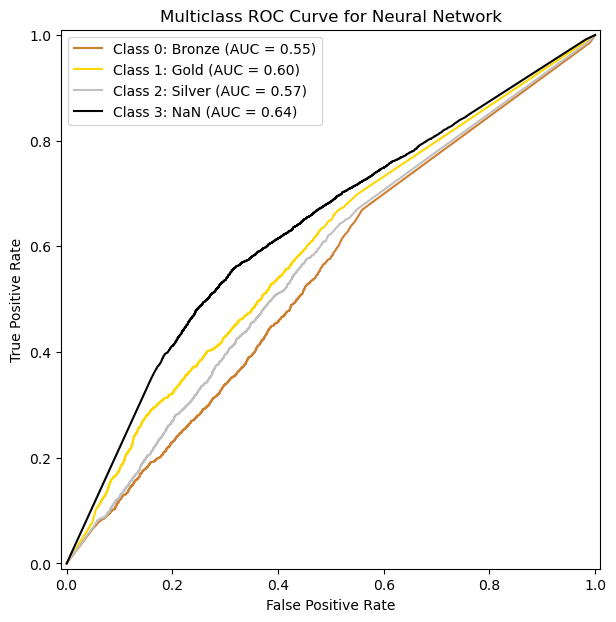

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define the device to use GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert your data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_resampled, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

# Create a PyTorch Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model using PyTorch with more layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNet(input_size=X_train_resampled.shape[1], num_classes=4).to(device)
criterion = nn.CrossEntropyLoss()

# Multiple learning rates to try
learning_rates = [0.001, 0.0005, 0.0001]

# Add early stopping to monitor validation loss
early_stopping_patience = 5
num_epochs = 100

# Define function to train the model and return validation loss
def train_model(lr, best_val_loss):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)
    early_stop_count = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        # Create a progress bar
        with tqdm(total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}] - LR: {lr}", unit="batch", mininterval=5) as pbar:
            for i, (inputs, labels) in enumerate(train_loader):
                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                if i % 100 == 0:  # Update the progress bar less frequently
                    pbar.update(100)
                    pbar.set_postfix({'Loss': running_loss / (i+1)})
        
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

        # Early stopping and validation loss check
        if avg_loss < best_val_loss:
            best_val_loss = avg_loss
            early_stop_count = 0  # reset if there's an improvement
        else:
            early_stop_count += 1
        
        scheduler.step(avg_loss)
        
        # If early stopping condition is met, break the loop
        if early_stop_count >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

    return best_val_loss

# Iterate over learning rates and train the model
best_val_loss = float('inf')  # Initialize best_val_loss

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    best_val_loss = train_model(lr, best_val_loss)

print(f"\nBest learning rate: {lr}, Validation loss: {best_val_loss:.4f}")




model.eval()  # Set model to evaluation mode
with torch.no_grad():
    Y_pred_logits = model(X_test_tensor)  # Get raw output logits
    Y_pred_nn = torch.argmax(Y_pred_logits, dim=1).cpu().numpy()  # Get predicted class labels

# Print classification report
print("Classification Report for Neural Network (PyTorch):")
print(classification_report(Y_test, Y_pred_nn))

# Plot ROC curve
plot_multiclass_roc_curve(model, X_test_scaled, Y_test, "Neural Network")


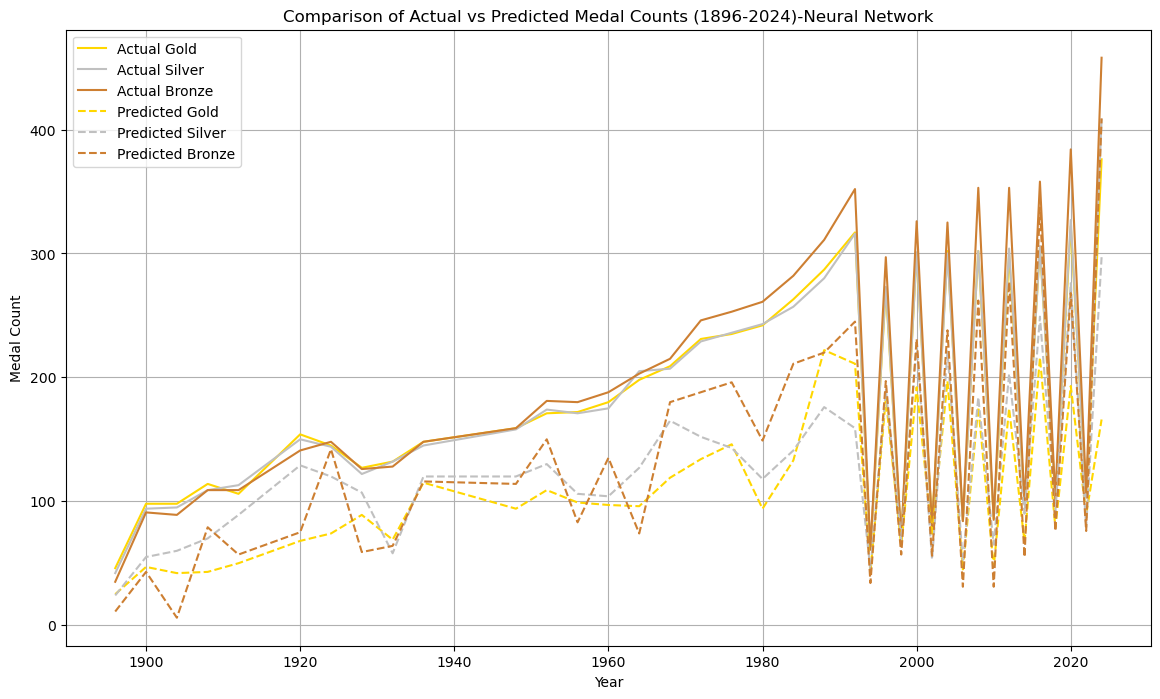

In [14]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_nn

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Neural Network')
plt.legend()
plt.grid(True)
plt.show()